In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import elementary_charge as e, electron_mass as m, Planck as h

In [205]:
m, e, h

(9.1093837015e-31, 1.602176634e-19, 6.62607015e-34)

In [206]:
# Experiment's Constants
R = 13.5 / 2 # [cm]

In [207]:
def calc_wave_length(voltage):
    return h/np.sqrt(2*m*e) * 1/np.sqrt(voltage) *10**12 #return in pm

In [215]:
# Load the experiment results
V = np.array([4.2,4,3.8,3.6,3.4,3.2,3,2.8,2.6,2.4,2.2,2,2.2,2.4,2.6,2.8,3,3.2,3.4,3.6,3.8,4,4.2]) * 1e3
wavelength = calc_wave_length(V)

L1_inner = np.array([2.2,2.3,2.4,2.4,2.7,2.8,2.8,3.2,3,3.7,3.8,4,3.5,3.4,3.3,3.1,3,2.8,2.8,2.6,2.6,2.5,2.3])
L1_outer = np.array([2.7, 2.8, 2.9, 3, 3.3, 3.4, 3.3, 3.8, 3.6, 4.4, 4.7, 4.7, 4.5, 4.3, 4, 3.6, 3.5, 3.3, 3.2, 3.1, 3, 2.9, 2.8])
L1 = (L1_inner + L1_outer) / 2
sin1 = np.sin(L1 / 8 / R)

L2_inner = np.array([4.1, 4.2, 4.4, 4.5, 4.7, 4.9, 4.8, 5.8, 5.2, 6.5, 6.8, 7, 6.5, 6.4, 6, 5.7, 5.4, 5.3, 5, 4.8, 4.7, 4.6, 4.4])
L2_outer = np.array([4.7, 4.7, 5, 5.3, 5.5, 5.7, 5.7, 6.5, 6.3, 7.5, 8.5, 9, 8, 7.5, 7.2, 6.5, 6.5, 5.9, 5.7, 5.7, 5.2, 5.3, 5.2])
L2 = (L2_inner + L2_outer) / 2
sin2 = np.sin(L2 / 8 / R)

In [216]:
# Calculate First
[coeff, err] = np.polyfit(wavelength, sin1, cov=True, deg=1)
[slope, offset] = coeff
slope_err, off_err = err[0, 0], err[1, 1]

d = 1 / 2 / slope
d_err = 0.5 * 1/slope**2 * np.sqrt(slope_err)

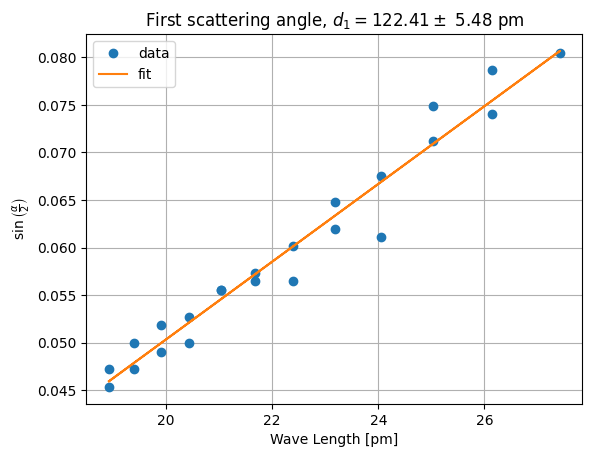

In [218]:
fit = np.polyval(coeff, wavelength)

plt.figure()
plt.title(f'First scattering angle, $d_1 = {d:.2f} \pm$ {d_err:.2f} pm')
plt.plot(wavelength, sin1, 'o', label='data')
plt.plot(wavelength, fit, label='fit')
plt.legend()
plt.xlabel('Wave Length [pm]')
plt.ylabel(r'$\sin\left(\frac{\alpha}{2}\right)$')
plt.grid()
plt.show()

In [220]:
# Calculate First
[coeff, err] = np.polyfit(wavelength, sin2, cov=True, deg=1)
[slope, offset] = coeff
slope_err, off_err = err[0, 0], err[1, 1]

d = 1 / 2 / slope
d_err = 1/2 * 1/slope**2 * np.sqrt(slope_err)

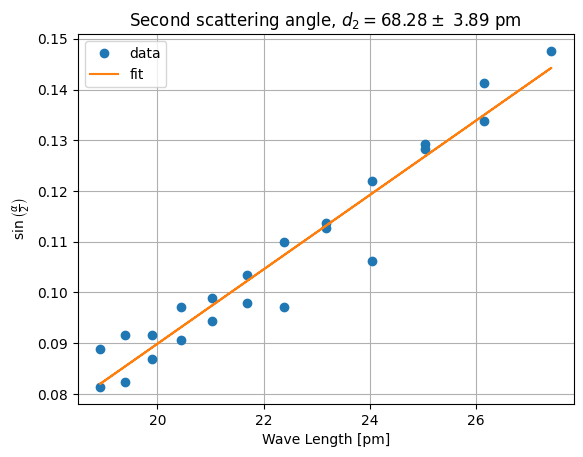

In [222]:
fit = np.polyval(coeff, wavelength)

plt.figure()
plt.title(f'Second scattering angle, $d_2 = {d:.2f} \pm$ {d_err:.2f} pm')
plt.plot(wavelength, sin2, 'o', label='data')
plt.plot(wavelength, fit, label='fit')
plt.legend()
plt.xlabel('Wave Length [pm]')
plt.ylabel(r'$\sin\left(\frac{\alpha}{2}\right)$')
plt.grid()
plt.show()

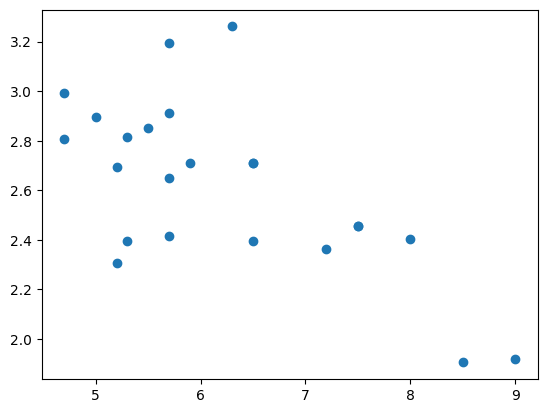

In [213]:
# Checking Interfrece pattern for largest d
d2 = 122 # [pm]
angle = 2 * np.arcsin(wavelength / 2 / d)
L_d2 = 4 * angle * R
plt.scatter(L2_outer, L_d2-L2_outer)